# Visualizing Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we need to make sure we have 0.20 for Plotting
# !conda update pandas -y

In [4]:
import pandas as pd
print(pd.__version__)

0.22.0


## First Step: Load Data and disassemble for our purposes

In [5]:
df = pd.read_csv('./insurance-customers-300.csv', sep=';')

In [6]:
y=df['group']

In [7]:
df.drop('group', axis='columns', inplace=True)

In [8]:
X = df.as_matrix()

In [9]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.863333,44.006667,31.220000
std,18.807545,16.191784,15.411792
min,132.000000,18.000000,5.000000
25%,159.000000,33.000000,18.000000
50%,171.000000,42.000000,30.000000
75%,187.000000,52.000000,43.000000
max,211.000000,90.000000,99.000000


## Second Step: Use Scatter Plot to plot data over all axis to get an intuition for it

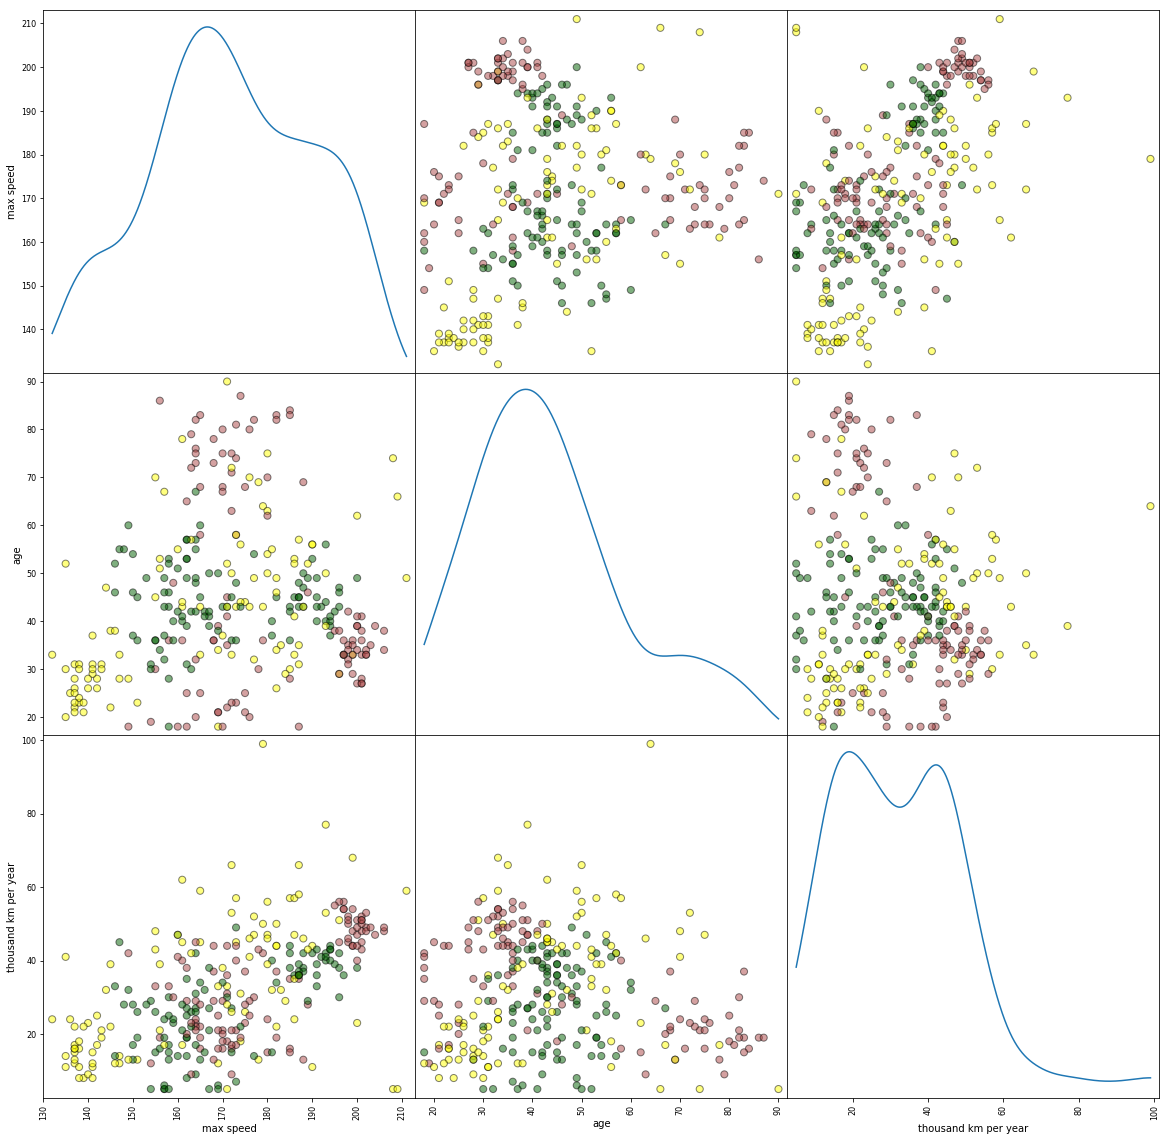

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.clf()
plt.figure(figsize=(20, 20))

CMAP = ListedColormap(['#AA4444', '#006000', '#FFFF00'])

pd.plotting.scatter_matrix(df, c=y, cmap=CMAP, s=200, edgecolor='black', figsize=(20, 20), diagonal='kde')
plt.show()
# plt.savefig('scatter-matrix.png')

## Third Step: Choose an intuitive view on your data - plot speed vs age only

In [11]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

In [12]:
X_kmh_age = X[:, :2]
X_2_dim = X_kmh_age

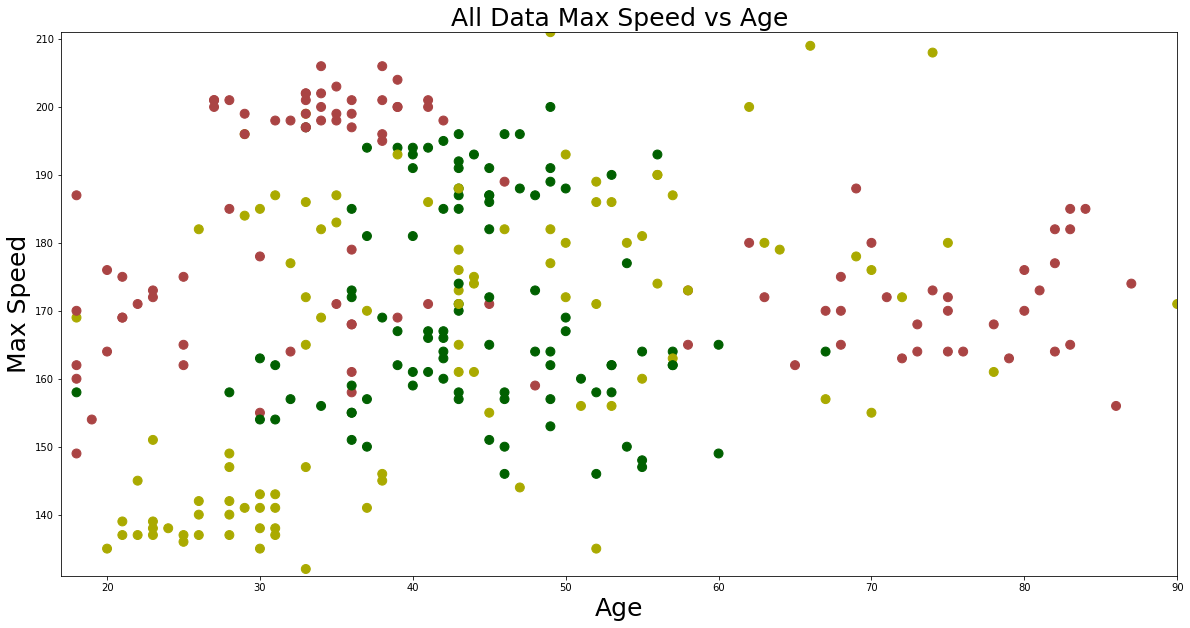

In [13]:
plotPrediction(None, X_2_dim[:, 1], X_2_dim[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data Max Speed vs Age")

## Correlation

In [11]:
corrmat = df.corr()

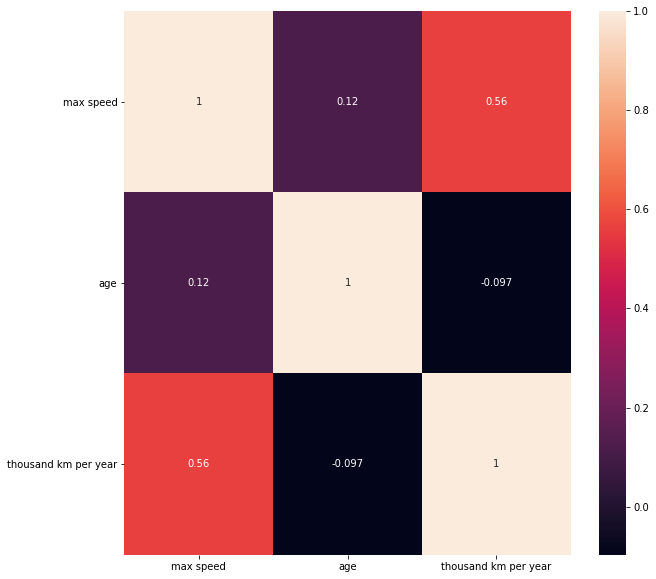

In [15]:
import seaborn as sns

sns.heatmap(corrmat, annot=True)
figure = plt.gcf()
figure.set_size_inches(10, 10)
plt.show()
# plt.savefig('corr.png')

In [16]:
def plot(col1, col2):
    # https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot
    sns.jointplot(df[col1],df[col2],dropna=True, kind="hex")
    figure = plt.gcf()
    figure.set_size_inches(10, 10)
    # for notebook
    plt.show()
#     plt.savefig('%s/%s_%s.png'%(IMG_DIR, col1, col2), dpi = DPI)

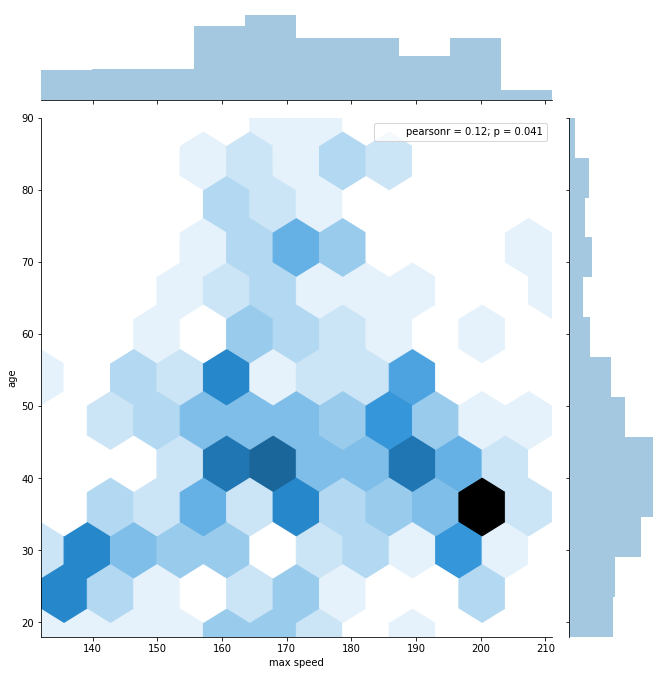

In [17]:
plot('max speed', 'age')

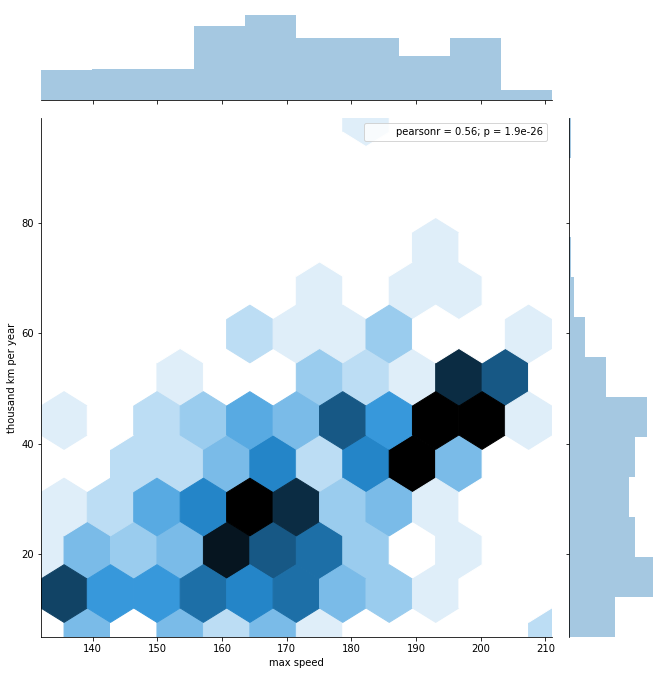

In [18]:
plot('max speed', 'thousand km per year')

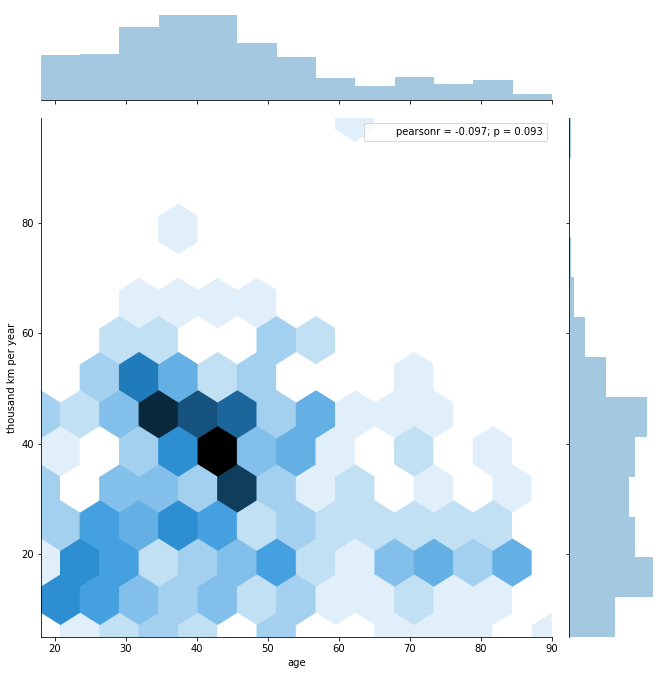

In [19]:
plot('age', 'thousand km per year')

## Linear Regression

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Text(0,0.5,'Thousand Km per Year')

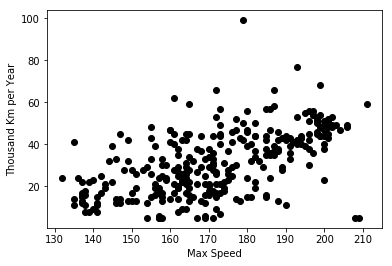

In [23]:
max_speed = df['max speed']
thousand_km_per_year = df['thousand km per year']
plt.scatter(max_speed, thousand_km_per_year,  color='black')
plt.xlabel('Max Speed')
plt.ylabel('Thousand Km per Year')

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(max_speed.reshape(-1, 1), thousand_km_per_year.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
thousand_km_per_year_pred = regr.predict(max_speed.reshape(-1, 1))

In [27]:
mean_squared_error(thousand_km_per_year, thousand_km_per_year_pred)

161.78972677283218

In [28]:
# Explained variance score: 1 is perfect prediction, pretty good score
r2_score(thousand_km_per_year, thousand_km_per_year_pred)

0.31656894655030343

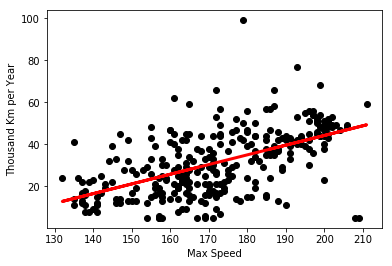

In [29]:
plt.scatter(max_speed, thousand_km_per_year,  color='black')
plt.xlabel('Max Speed')
plt.ylabel('Thousand Km per Year')
plt.plot(max_speed, thousand_km_per_year_pred, color='red', linewidth=3)